# Task1: Neural Networks: MNIST image classification

# Task1: MNIST image classification

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [31]:
def forward_prop(data, labels, params):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    z1 = np.dot(data, W1) + b1
    h = sigmoid(z1)

    z2 = np.dot(h, W2) + b2
    y = softmax(z2)

    cost = -np.mean(np.sum(labels * np.log(y), axis=1))

    return h, y, cost

In [32]:
def backward_prop(data, labels, params, h, y):
    W1 = params['W1']
    b1 = params['b1']
    W2 = params['W2']
    b2 = params['b2']

    gradz2 = y - labels
    gradW2 = np.dot(h.T, gradz2)
    gradb2 = np.sum(gradz2, axis=0)

    gradz1 = np.dot(gradz2, W2.T) * (h * (1 - h))
    gradW1 = np.dot(data.T, gradz1)
    gradb1 = np.sum(gradz1, axis=0)

    grad = {'W1': gradW1, 'b1': gradb1, 'W2': gradW2, 'b2': gradb2}

    return grad

In [33]:
def compute_accuracy(output, labels):
    accuracy = (np.argmax(output,axis=1) == np.argmax(labels,axis=1)).sum() * 1. / labels.shape[0]
    return accuracy

def one_hot_labels(labels):
    one_hot_labels = np.zeros((labels.size, 10))
    one_hot_labels[np.arange(labels.size),labels.astype(int)] = 1
    return one_hot_labels

In [34]:
def nn_train(trainData, trainLabels, devData, devLabels, num_epochs=30, learning_rate=5, batch_size=1000):
    (m, n) = trainData.shape
    num_hidden = 300
    params = {}

    # Initialize parameters
    np.random.seed(42)
    params['W1'] = np.random.randn(n, num_hidden)
    params['b1'] = np.zeros(num_hidden)
    params['W2'] = np.random.randn(num_hidden, 10)
    params['b2'] = np.zeros(10)

    train_losses = []
    dev_losses = []
    train_accuracies = []
    dev_accuracies = []

    for epoch in range(num_epochs):
        for i in range(0, m, batch_size):
            batch_data = trainData[i:i + batch_size, :]
            batch_labels = trainLabels[i:i + batch_size, :]

            h, y, cost = forward_prop(batch_data, batch_labels, params)
            grad = backward_prop(batch_data, batch_labels, params, h, y)

            for key in params:
                params[key] -= learning_rate * grad[key] / batch_size

        # Calculate loss and accuracy for training set
        h_train, y_train, cost_train = forward_prop(trainData, trainLabels, params)
        train_accuracy = compute_accuracy(y_train, trainLabels)
        train_losses.append(cost_train)
        train_accuracies.append(train_accuracy)

        # Calculate loss and accuracy for dev set
        h_dev, y_dev, cost_dev = forward_prop(devData, devLabels, params)
        dev_accuracy = compute_accuracy(y_dev, devLabels)
        dev_losses.append(cost_dev)
        dev_accuracies.append(dev_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {cost_train:.4f}, Dev Loss: {cost_dev:.4f}, "
              f"Train Acc: {train_accuracy:.4f}, Dev Acc: {dev_accuracy:.4f}")

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train')
    plt.plot(range(num_epochs), dev_losses, label='Dev')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accuracies, label='Train')
    plt.plot(range(num_epochs), dev_accuracies, label='Dev')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return params


In [58]:
def nn_train_reg(trainData, trainLabels, devData, devLabels, num_epochs=30, learning_rate=5, reg_lambda = 0.0001, batch_size=1000):
    (m, n) = trainData.shape
    num_hidden = 300
    params = {}

    # Initialize parameters
    np.random.seed(42)
    params['W1'] = np.random.randn(n, num_hidden)
    params['b1'] = np.zeros(num_hidden)
    params['W2'] = np.random.randn(num_hidden, 10)
    params['b2'] = np.zeros(10)

    train_losses = []
    dev_losses = []
    train_accuracies = []
    dev_accuracies = []

    for epoch in range(num_epochs):
        for i in range(0, m, batch_size):
            batch_data = trainData[i:i + batch_size, :]
            batch_labels = trainLabels[i:i + batch_size, :]

            h, y, cost = forward_prop(batch_data, batch_labels, params)
            grad = backward_prop(batch_data, batch_labels, params, h, y)

            for key in params:
                if (key == 'W1' or key == 'W2'):
                    params[key] -= learning_rate * (grad[key] + 2 * reg_lambda * params[key] * np.linalg.norm(params[key])) / batch_size
                else:
                    params[key] -= learning_rate * grad[key] / batch_size

        # Calculate loss and accuracy for training set
        h_train, y_train, cost_train = forward_prop(trainData, trainLabels, params)
        train_accuracy = compute_accuracy(y_train, trainLabels)
        train_losses.append(cost_train)
        train_accuracies.append(train_accuracy)

        # Calculate loss and accuracy for dev set
        h_dev, y_dev, cost_dev = forward_prop(devData, devLabels, params)
        dev_accuracy = compute_accuracy(y_dev, devLabels)
        dev_losses.append(cost_dev)
        dev_accuracies.append(dev_accuracy)

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {cost_train:.4f}, Dev Loss: {cost_dev:.4f}, "
              f"Train Acc: {train_accuracy:.4f}, Dev Acc: {dev_accuracy:.4f}")

    # Plotting
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Train')
    plt.plot(range(num_epochs), dev_losses, label='Dev')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accuracies, label='Train')
    plt.plot(range(num_epochs), dev_accuracies, label='Dev')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return params

In [41]:
def nn_test(data, labels, params):
    h, output, cost = forward_prop(data, labels, params)
    accuracy = compute_accuracy(output, labels)
    return accuracy

In [50]:
np.random.seed(100)
trainData, trainLabels = readData('images_train.csv', 'labels_train.csv')
trainLabels = one_hot_labels(trainLabels)
p = np.random.permutation(60000)
trainData = trainData[p,:]
trainLabels = trainLabels[p,:]

devData = trainData[0:10000,:]
devLabels = trainLabels[0:10000,:]
trainData = trainData[10000:,:]
trainLabels = trainLabels[10000:,:]

mean = np.mean(trainData)
std = np.std(trainData)
trainData = (trainData - mean) / std
devData = (devData - mean) / std

testData, testLabels = readData('images_test.csv', 'labels_test.csv')
testLabels = one_hot_labels(testLabels)
testData = (testData - mean) / std

# readyForTesting = False
# if readyForTesting:
#     accuracy = nn_test(testData, testLabels, params)

Epoch 1/30, Train Loss: 0.6168, Dev Loss: 0.7134, Train Acc: 0.8676, Dev Acc: 0.8552
Epoch 2/30, Train Loss: 0.3895, Dev Loss: 0.5384, Train Acc: 0.9074, Dev Acc: 0.8795
Epoch 3/30, Train Loss: 0.2949, Dev Loss: 0.4703, Train Acc: 0.9266, Dev Acc: 0.8925
Epoch 4/30, Train Loss: 0.2417, Dev Loss: 0.4317, Train Acc: 0.9391, Dev Acc: 0.8997
Epoch 5/30, Train Loss: 0.2066, Dev Loss: 0.4057, Train Acc: 0.9474, Dev Acc: 0.9035
Epoch 6/30, Train Loss: 0.1809, Dev Loss: 0.3878, Train Acc: 0.9540, Dev Acc: 0.9052
Epoch 7/30, Train Loss: 0.1611, Dev Loss: 0.3732, Train Acc: 0.9589, Dev Acc: 0.9070
Epoch 8/30, Train Loss: 0.1457, Dev Loss: 0.3616, Train Acc: 0.9632, Dev Acc: 0.9111
Epoch 9/30, Train Loss: 0.1329, Dev Loss: 0.3517, Train Acc: 0.9666, Dev Acc: 0.9133
Epoch 10/30, Train Loss: 0.1222, Dev Loss: 0.3434, Train Acc: 0.9698, Dev Acc: 0.9155
Epoch 11/30, Train Loss: 0.1127, Dev Loss: 0.3363, Train Acc: 0.9726, Dev Acc: 0.9177
Epoch 12/30, Train Loss: 0.1046, Dev Loss: 0.3311, Train Acc: 0

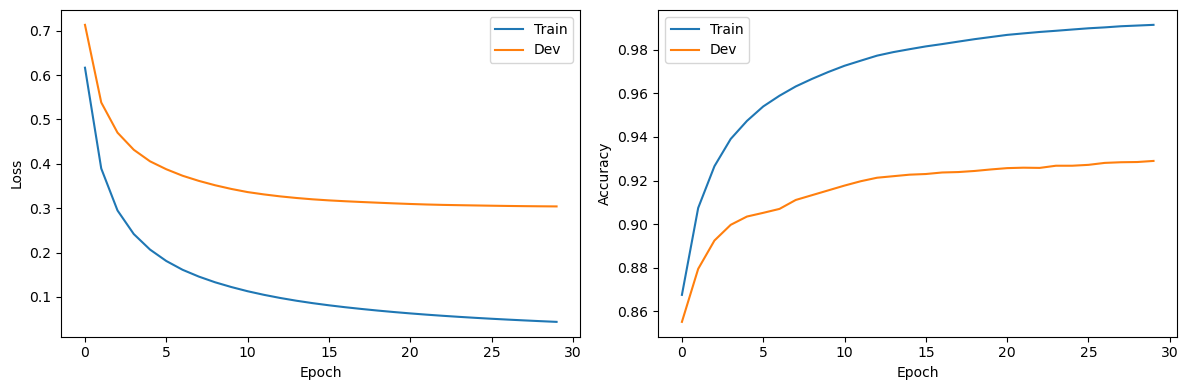

In [60]:
params = nn_train(trainData, trainLabels, devData, devLabels)


Epoch 1/30, Train Loss: 0.6062, Dev Loss: 0.7089, Train Acc: 0.8690, Dev Acc: 0.8567
Epoch 2/30, Train Loss: 0.3801, Dev Loss: 0.5285, Train Acc: 0.9098, Dev Acc: 0.8835
Epoch 3/30, Train Loss: 0.2851, Dev Loss: 0.4555, Train Acc: 0.9294, Dev Acc: 0.8939
Epoch 4/30, Train Loss: 0.2329, Dev Loss: 0.4145, Train Acc: 0.9408, Dev Acc: 0.9013
Epoch 5/30, Train Loss: 0.1966, Dev Loss: 0.3878, Train Acc: 0.9496, Dev Acc: 0.9062
Epoch 6/30, Train Loss: 0.1697, Dev Loss: 0.3670, Train Acc: 0.9563, Dev Acc: 0.9116
Epoch 7/30, Train Loss: 0.1494, Dev Loss: 0.3504, Train Acc: 0.9615, Dev Acc: 0.9147
Epoch 8/30, Train Loss: 0.1332, Dev Loss: 0.3370, Train Acc: 0.9663, Dev Acc: 0.9171
Epoch 9/30, Train Loss: 0.1198, Dev Loss: 0.3257, Train Acc: 0.9704, Dev Acc: 0.9191
Epoch 10/30, Train Loss: 0.1089, Dev Loss: 0.3165, Train Acc: 0.9734, Dev Acc: 0.9210
Epoch 11/30, Train Loss: 0.0996, Dev Loss: 0.3086, Train Acc: 0.9760, Dev Acc: 0.9234
Epoch 12/30, Train Loss: 0.0915, Dev Loss: 0.3018, Train Acc: 0

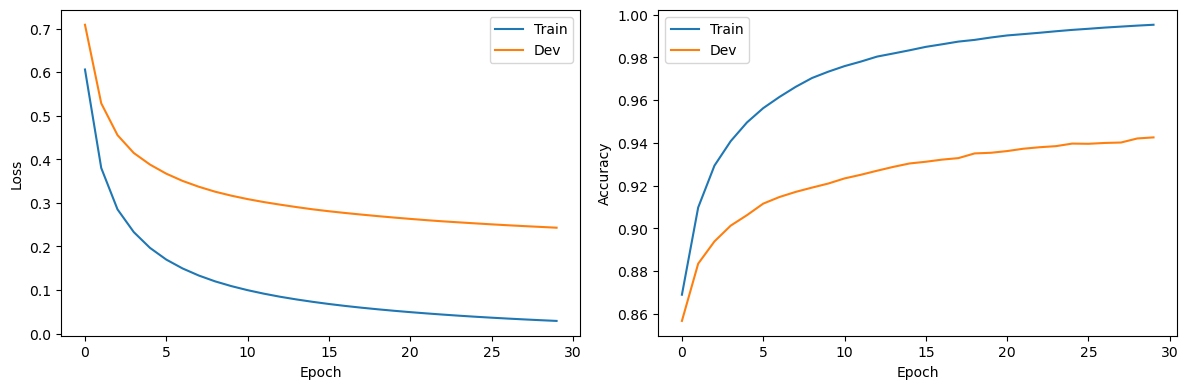

In [61]:
params_reg = nn_train_reg(trainData, trainLabels, devData, devLabels)

In [62]:
accuracy1 = nn_test(testData, testLabels, params)
accuracy2 = nn_test(testData, testLabels, params_reg)

print("NN acc: ", accuracy1)
print("NN L2 regularized acc: ", accuracy2)

NN acc:  0.9329
NN L2 regularized acc:  0.9429
